**Created by Berkay Alan**

**Natural Language Proccessing Series 2- Text Preprocessing**

**14 of February, 2022**

For more Tutorial: https://www.kaggle.com/berkayalan

# Content

- Text Preprocessing : Converting string to other data types

- Text Preprocessing : Case Conversion

- Text Preprocessing : Handling with Punctuation

- Text Preprocessing : Handling with Numbers

- Text Preprocessing : Handling with Stopwords

- Text Preprocessing : Handling with Frequnecies

- Text Preprocessing : Tokenization

- Text Preprocessing : Stemming

- Text Preprocessing : Lemmatization

***

For the string essentials, please check the first part [here](https://github.com/berkayalan/Data-Science-Tutorials/tree/master/Natural%20Language%20Processing).

# Resources

- [**What Is Natural Language Processing?**](https://machinelearningmastery.com/natural-language-processing/)

- [**Text Processing in Python**](https://towardsdatascience.com/text-processing-in-python-29e86ea4114c)

- [**Text Preprocessing in NLP with Python codes**](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/)

- [**Ultimate Guide to Understand and Implement Natural Language Processing (with codes in Python)**](https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/)

- [**How to Clean Text for Machine Learning with Python**](https://machinelearningmastery.com/clean-text-machine-learning-python/)

- [**Dropping common terms: stop words by StanfordNLP**](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html)

- [**Natural Language Processing With Python's NLTK Package**](https://realpython.com/nltk-nlp-python/)

- [**Beginners Tutorial for Regular Expressions in Python**](https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/)

- [**Stemming and lemmatization by StanfordNLP**](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

- [**Stemming and Lemmatization in Python**](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)

# Importing Libraries

In [1]:
import nltk
#nltk.download('stopwords')
#nltk.download("punkt")
#nltk.download("wordnet")
from nltk.corpus import stopwords
from textblob import TextBlob,Word
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import Word,TextBlob
import textblob, string, re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Text Preprocessing

 Since, text is the most unstructured form of all the available data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The whole process of standardization and cleaning of text, making it ready for analysis is known as **text preprocessing**.

The general pipeline of text preprocessing can be visualized as below:

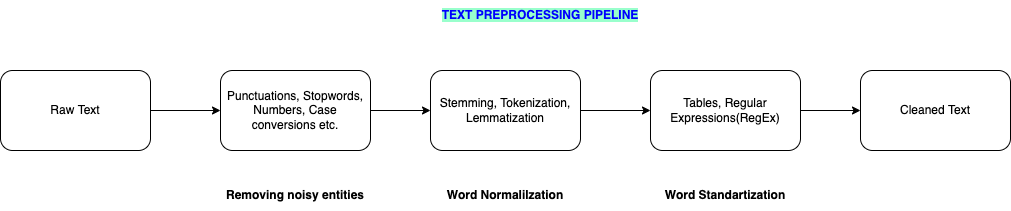

## Getting the Text

In [3]:
text = """
Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as "very poor".
Insulation, together with renewable power, is the way out of the current energy crisis, he says.
Two-thirds of homes, or 19 million, need better insulation, according to government data.
That raises an obvious question: if it is such a good idea, why aren't we all doing it?
The key issue is the cost.
Britain is frequently described as having some of the oldest and least energy efficient housing in Europe. Retrofitting - adding insulation to existing homes - can be very expensive and Mr Stark says the government isn't doing enough to help fund this costly work.
"""

This text is taken from [here](https://www.bbc.com/news/science-environment-60290876).

In [4]:
print(text)


Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as "very poor".
Insulation, together with renewable power, is the way out of the current energy crisis, he says.
Two-thirds of homes, or 19 million, need better insulation, according to government data.
That raises an obvious question: if it is such a good idea, why aren't we all doing it?
The key issue is the cost.
Britain is frequently described as having some of the oldest and least energy efficient housing in Europe. Retrofitting - adding insulation to existing homes - can be very expensive and Mr Stark says the government isn't doing enough to help fund this costly work.



In [5]:
text_backup = text

## Converting string to other data types

In [6]:
text.split()[:10]

['Chris',
 'Stark,',
 'head',
 'of',
 'the',
 "UK's",
 'Climate',
 'Change',
 'Committee,',
 'told']

In [7]:
text.split("\n") # It splits by blanks if we use \n

['',
 'Chris Stark, head of the UK\'s Climate Change Committee, told the BBC he rates government policy on insulation as "very poor".',
 'Insulation, together with renewable power, is the way out of the current energy crisis, he says.',
 'Two-thirds of homes, or 19 million, need better insulation, according to government data.',
 "That raises an obvious question: if it is such a good idea, why aren't we all doing it?",
 'The key issue is the cost.',
 "Britain is frequently described as having some of the oldest and least energy efficient housing in Europe. Retrofitting - adding insulation to existing homes - can be very expensive and Mr Stark says the government isn't doing enough to help fund this costly work.",
 '']

In [8]:
sentences_text = text.split("\n")

In [9]:
text_to_series = pd.Series(sentences_text)

In [10]:
text_to_series

0                                                                                                                                                                                                                                                                            
1    Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as "very poor".                                                                                                                                           
2    Insulation, together with renewable power, is the way out of the current energy crisis, he says.                                                                                                                                                                        
3    Two-thirds of homes, or 19 million, need better insulation, according to government data.                                                                                                

In [11]:
text_vector = text_to_series[1:len(text_to_series)-1]

In [12]:
text_vector

1    Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as "very poor".                                                                                                                                           
2    Insulation, together with renewable power, is the way out of the current energy crisis, he says.                                                                                                                                                                        
3    Two-thirds of homes, or 19 million, need better insulation, according to government data.                                                                                                                                                                               
4    That raises an obvious question: if it is such a good idea, why aren't we all doing it?                                                                                                  

In [13]:
text_df = pd.DataFrame(text_vector, columns = ["sentences"])

In [14]:
text_df

,sentences
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor""."
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says."
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data."
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?"
5,The key issue is the cost.
6,Britain is frequently described as having some of the oldest and least energy efficient housing in Europe. Retrofitting - adding insulation to existing homes - can be very expensive and Mr Stark says the government isn't doing enough to help fund this costly work.


In [15]:
text_df_backup = text_df.copy()

## Case Conversion

In [16]:
tdf = text_df.copy()

In [17]:
tdf

,sentences
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor""."
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says."
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data."
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?"
5,The key issue is the cost.
6,Britain is frequently described as having some of the oldest and least energy efficient housing in Europe. Retrofitting - adding insulation to existing homes - can be very expensive and Mr Stark says the government isn't doing enough to help fund this costly work.


In [18]:
job = ["Machine ","Learning ","Engineer"]

In [19]:
str1 = "".join(text for text in job)

In [20]:
str1

'Machine Learning Engineer'

Let's make all characters lower.

In [21]:
tdf["lower_sentences"] = tdf["sentences"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [22]:
tdf.head()

,sentences,lower_sentences
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor""."
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says."
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data."
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?"
5,The key issue is the cost.,the key issue is the cost.


## Handling with Punctuation

We will use regular expressions here. We will dive into to this subject later, but for now it's better to know this notation:

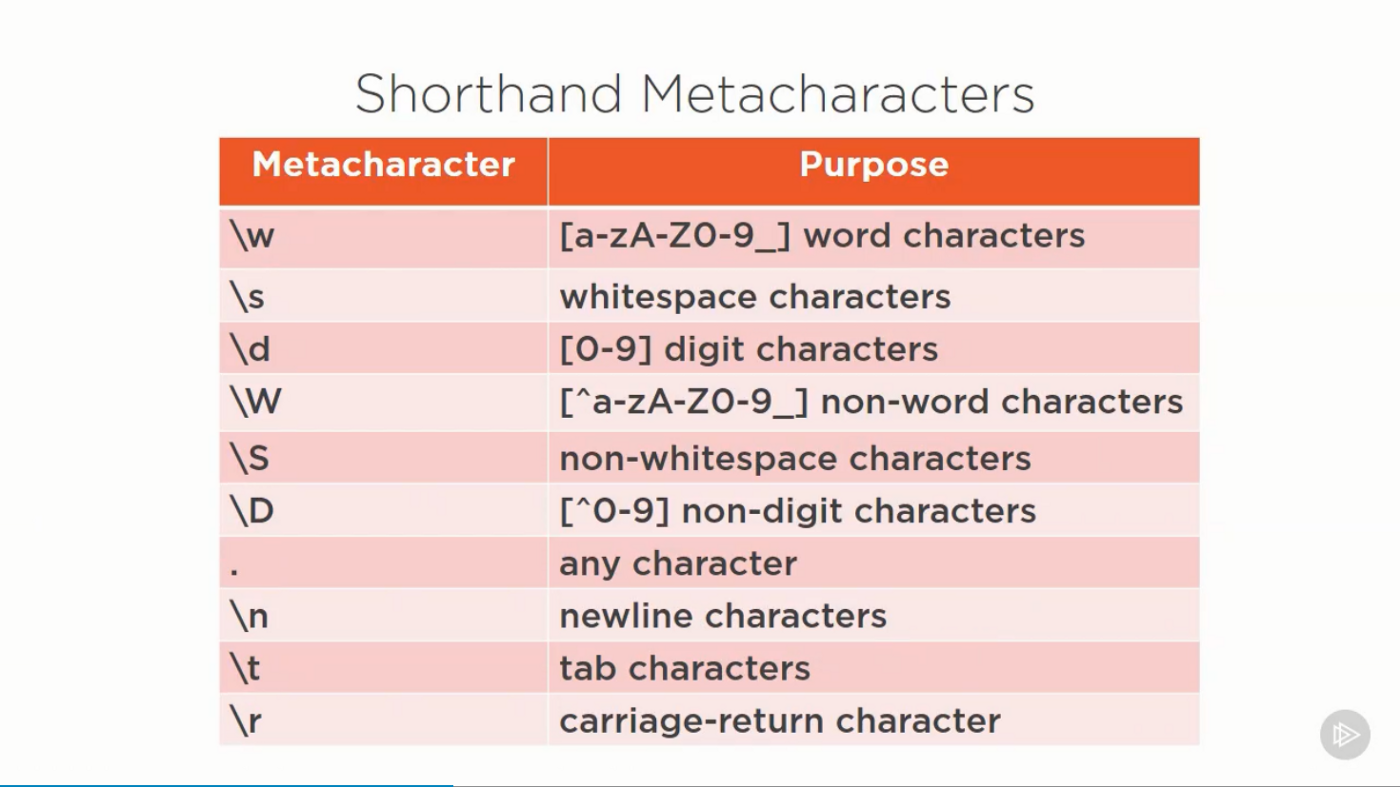

This is taken from [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fjavarevisited%2F7-best-regular-expression-courses-for-developers-to-learn-in-2021-9b8cb37bb3a5&psig=AOvVaw0KIdD3bmA6t_hBaQmEXJN3&ust=1644555701731000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKDH8cWt9PUCFQAAAAAdAAAAABAN).

In [23]:
tdf.head()

,sentences,lower_sentences
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor""."
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says."
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data."
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?"
5,The key issue is the cost.,the key issue is the cost.


In [24]:
type(tdf)

pandas.core.frame.DataFrame

In [25]:
tdf["punctuation_removed"] = tdf["lower_sentences"].str.replace("[^\w\s]","")

In [26]:
tdf.head()

,sentences,lower_sentences,punctuation_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?",that raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,the key issue is the cost.,the key issue is the cost


We can also do the same with *string* library that contains punctuation.

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
text_df_backup.head()

,sentences
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor""."
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says."
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data."
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?"
5,The key issue is the cost.


In [29]:
def handling_with_punctuation(text):
    new_text = "".join([letter for letter in text if letter not in string.punctuation])
    return new_text

In [30]:
text_df_backup['sentences_punctuation'] = ""
text_df_backup['sentences_punctuation']= text_df_backup['sentences'].apply(lambda text:handling_with_punctuation(text))

In [31]:
text_df_backup.head()

,sentences,sentences_punctuation
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".",Chris Stark head of the UKs Climate Change Committee told the BBC he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.",Insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.",Twothirds of homes or 19 million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?",That raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,The key issue is the cost


## Handling with Numbers

In [32]:
tdf.head()

,sentences,lower_sentences,punctuation_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?",that raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,the key issue is the cost.,the key issue is the cost


In [33]:
tdf["numbers_removed"] = tdf["punctuation_removed"].str.replace("\d","")

In [34]:
tdf.head()

,sentences,lower_sentences,punctuation_removed,numbers_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?",that raises an obvious question if it is such a good idea why arent we all doing it,that raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,the key issue is the cost.,the key issue is the cost,the key issue is the cost


## Handling with Stopwords

**What is stopword?**

 Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called *stopwords* . The general strategy for determining a stop list is to sort the terms by collection frequency (the total number of times each term appears in the document collection), and then to take the most frequent terms, often hand-filtered for their semantic content relative to the domain of the documents being indexed, as a stop list , the members of which are then discarded during indexing. Using a stop list significantly reduces the number of postings that a system has to store.
 
 Some English stopwords are:
 
 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"
 
 In every language, there are different stopwords. We will move into with the English one and delete if our sentences contain these words. **nltk** library helps us to find English stopwords.

In [35]:
tdf.head()

,sentences,lower_sentences,punctuation_removed,numbers_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?",that raises an obvious question if it is such a good idea why arent we all doing it,that raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,the key issue is the cost.,the key issue is the cost,the key issue is the cost


In [36]:
tdf["numbers_removed"].iloc[4]

'the key issue is the cost'

In [37]:
sw = stopwords.words("english")

In [38]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [39]:
tdf["stopwords_removed"] = tdf["numbers_removed"].apply(lambda x: " ".join(word for word in x.split() 
                                                                           if word not in sw))

In [40]:
tdf.head()

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?","that raises an obvious question: if it is such a good idea, why aren't we all doing it?",that raises an obvious question if it is such a good idea why arent we all doing it,that raises an obvious question if it is such a good idea why arent we all doing it,raises obvious question good idea arent
5,The key issue is the cost.,the key issue is the cost.,the key issue is the cost,the key issue is the cost,key issue cost


In [41]:
tdf["stopwords_removed"].iloc[4]

'key issue cost'

## Handling with Frequnecies

In [42]:
type(tdf)

pandas.core.frame.DataFrame

In [43]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data


Now let's see frequencies of each word.

In [44]:
pd.Series(" ".join(tdf["stopwords_removed"]).split()).value_counts()

insulation      4
government      3
stark           2
energy          2
homes           2
says            2
million         1
frequently      1
need            1
change          1
together        1
enough          1
raises          1
described       1
costly          1
policy          1
current         1
crisis          1
housing         1
committee       1
good            1
least           1
better          1
adding          1
retrofitting    1
uks             1
expensive       1
poor            1
key             1
obvious         1
renewable       1
according       1
work            1
idea            1
power           1
britain         1
head            1
data            1
arent           1
twothirds       1
mr              1
cost            1
europe          1
fund            1
existing        1
told            1
way             1
oldest          1
isnt            1
bbc             1
rates           1
climate         1
help            1
efficient       1
question        1
chris     

Our text is very small. But if we have huge text and want to delete the least frequent words, we can do with this way.

In [45]:
delete = pd.Series(" ".join(tdf["stopwords_removed"]).split()).value_counts()[-3:]

In [46]:
delete

question    1
chris       1
issue       1
dtype: int64

In [47]:
tdf["stopwords_removed"].apply(lambda x: " ".join(i for i in x.split() if i not in delete))

1    stark head uks climate change committee told bbc rates government policy insulation poor                                                                                                    
2    insulation together renewable power way current energy crisis says                                                                                                                          
3    twothirds homes million need better insulation according government data                                                                                                                    
4    raises obvious good idea arent                                                                                                                                                              
5    key cost                                                                                                                                                                                    
6    britain frequently descri

## Tokenization

By tokenizing, we can conveniently split up text by word or by sentence. This will allow us to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s our first step in turning unstructured data into structured data, which is easier to analyze.

 So, we can say that tokens are words or entities present in the text.

In [48]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data


In [49]:
TextBlob(tdf["stopwords_removed"][1]).words

WordList(['chris', 'stark', 'head', 'uks', 'climate', 'change', 'committee', 'told', 'bbc', 'rates', 'government', 'policy', 'insulation', 'poor'])

In [50]:
tdf["tokenized"] = tdf["stopwords_removed"].apply(lambda x: TextBlob(x).words)

In [51]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed,tokenized
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor,"[chris, stark, head, uks, climate, change, committee, told, bbc, rates, government, policy, insulation, poor]"
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says,"[insulation, together, renewable, power, way, current, energy, crisis, says]"
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data,"[twothirds, homes, million, need, better, insulation, according, government, data]"


We can also do the same with regex(re) library.

In [52]:
text_df_backup.head()

,sentences,sentences_punctuation
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".",Chris Stark head of the UKs Climate Change Committee told the BBC he rates government policy on insulation as very poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.",Insulation together with renewable power is the way out of the current energy crisis he says
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.",Twothirds of homes or 19 million need better insulation according to government data
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?",That raises an obvious question if it is such a good idea why arent we all doing it
5,The key issue is the cost.,The key issue is the cost


In [53]:
text_df_backup['tokenized']= text_df_backup['sentences_punctuation'].apply(lambda text: re.split(' ',text))

In [54]:
text_df_backup.head()

,sentences,sentences_punctuation,tokenized
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".",Chris Stark head of the UKs Climate Change Committee told the BBC he rates government policy on insulation as very poor,"[Chris, Stark, head, of, the, UKs, Climate, Change, Committee, told, the, BBC, he, rates, government, policy, on, insulation, as, very, poor]"
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.",Insulation together with renewable power is the way out of the current energy crisis he says,"[Insulation, together, with, renewable, power, is, the, way, out, of, the, current, energy, crisis, he, says]"
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.",Twothirds of homes or 19 million need better insulation according to government data,"[Twothirds, of, homes, or, 19, million, need, better, insulation, according, to, government, data]"
4,"That raises an obvious question: if it is such a good idea, why aren't we all doing it?",That raises an obvious question if it is such a good idea why arent we all doing it,"[That, raises, an, obvious, question, if, it, is, such, a, good, idea, why, arent, we, all, doing, it]"
5,The key issue is the cost.,The key issue is the cost,"[The, key, issue, is, the, cost]"


## Stemming

 For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

 Stemming is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  To give an example, words like ‘developer’, ‘developing, ‘develop’ will be stemmed to ‘develop’. But the *disadvantage* of stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word. 
 
 In order to do stemming, we will use **PorterStemmer()** function of nltk library.

In [55]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed,tokenized
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor,"[chris, stark, head, uks, climate, change, committee, told, bbc, rates, government, policy, insulation, poor]"
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says,"[insulation, together, renewable, power, way, current, energy, crisis, says]"
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data,"[twothirds, homes, million, need, better, insulation, according, government, data]"


In [56]:
st = PorterStemmer()

In [57]:
tdf["stemmed"] = tdf["stopwords_removed"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [58]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed,tokenized,stemmed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor,"[chris, stark, head, uks, climate, change, committee, told, bbc, rates, government, policy, insulation, poor]",chri stark head uk climat chang committe told bbc rate govern polici insul poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says,"[insulation, together, renewable, power, way, current, energy, crisis, says]",insul togeth renew power way current energi crisi say
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data,"[twothirds, homes, million, need, better, insulation, according, government, data]",twothird home million need better insul accord govern data


## Lemmatization

 Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called *Lemma*. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words. To give an example, let's check the table below:
 
 | Original | Stemming Form | Lemmatization Form |
| --- | --- | --- |
| goose | goos | goose |
| geese | gees | goose |

We will use **Word()** module of nltk for lemmatization.

In [280]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed,tokenized,stemmed
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor,"[chris, stark, head, uks, climate, change, committee, told, bbc, rates, government, policy, insulation, poor]",chri stark head uk climat chang committe told bbc rate govern polici insul poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says,"[insulation, together, renewable, power, way, current, energy, crisis, says]",insul togeth renew power way current energi crisi say
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data,"[twothirds, homes, million, need, better, insulation, according, government, data]",twothird home million need better insul accord govern data


In [285]:
tdf["lemmatized"] = tdf["stopwords_removed"].apply(lambda text: " ".join([Word(word).lemmatize() 
                                                                          for word in text.split()]))

In [286]:
tdf.head(3)

,sentences,lower_sentences,punctuation_removed,numbers_removed,stopwords_removed,tokenized,stemmed,lemmatized
1,"Chris Stark, head of the UK's Climate Change Committee, told the BBC he rates government policy on insulation as ""very poor"".","chris stark, head of the uk's climate change committee, told the bbc he rates government policy on insulation as ""very poor"".",chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head of the uks climate change committee told the bbc he rates government policy on insulation as very poor,chris stark head uks climate change committee told bbc rates government policy insulation poor,"[chris, stark, head, uks, climate, change, committee, told, bbc, rates, government, policy, insulation, poor]",chri stark head uk climat chang committe told bbc rate govern polici insul poor,chris stark head uk climate change committee told bbc rate government policy insulation poor
2,"Insulation, together with renewable power, is the way out of the current energy crisis, he says.","insulation, together with renewable power, is the way out of the current energy crisis, he says.",insulation together with renewable power is the way out of the current energy crisis he says,insulation together with renewable power is the way out of the current energy crisis he says,insulation together renewable power way current energy crisis says,"[insulation, together, renewable, power, way, current, energy, crisis, says]",insul togeth renew power way current energi crisi say,insulation together renewable power way current energy crisis say
3,"Two-thirds of homes, or 19 million, need better insulation, according to government data.","two-thirds of homes, or 19 million, need better insulation, according to government data.",twothirds of homes or 19 million need better insulation according to government data,twothirds of homes or million need better insulation according to government data,twothirds homes million need better insulation according government data,"[twothirds, homes, million, need, better, insulation, according, government, data]",twothird home million need better insul accord govern data,twothirds home million need better insulation according government data


We can also use **WordNetLemmatizer()** function of nltk.

In [289]:
wordnet_lemmatizer = WordNetLemmatizer()

In [290]:
tdf["stopwords_removed"].apply(lambda text: " ".join([wordnet_lemmatizer.lemmatize(word)
                                                                          for word in text.split()]))

1    chris stark head uk climate change committee told bbc rate government policy insulation poor                                                                                              
2    insulation together renewable power way current energy crisis say                                                                                                                         
3    twothirds home million need better insulation according government data                                                                                                                   
4    raise obvious question good idea arent                                                                                                                                                    
5    key issue cost                                                                                                                                                                            
6    britain frequently described oldest

***

**Upcoming Tutorials**

- Computational Linguistics Applications : N-Gram

- Computational Linguistics Applications : Part of speech tagging (POS)

- Computational Linguistics Applications : Chunking(Shallow Parsing)

- Computational Linguistics Applications : Named Entity Recognition(NER)

- Text Feature Engineering 

- Bag of Words

- Text Visualisation : Bar Plot

- Text Visualisation : Frequency Visualisation

- Text Visualisation : WordCloud

- Transformers, Encoders and Decoders

- Different Models : Bert, HuggingFace, StanfordNLP, NLTK, LSTM etc.

- Sentiment Analysis with Logistic Regression

- Sentiment Analysis with Naive Bayes

- Vector Space Models

- Neural Machine Translation

- Text Summarization

- Classification with Bert

***

<div class="alert alert-block alert-success">
<b>Future Plans</b>
    <li>Regex</li>
    <li>Turkish NLP</li>
    <li>Spacy</li>
    
</div>

Stay motivated!